# GeoPandas example

This notebook reads data from an [online survey](https://forms.gle/R18cpN6yEHesSNxa7) where respondents provide the name and location (latitude and longitude) of their "home town".

If you are following the *Elements of Data Science* curriculum, you can read this notebook after doing the `02_times` notebook.  I'll use some features you have not seen yet, but you can get a preview of where we are headed.

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ElementsOfDataScience/blob/v1/geo_example.ipynb).

The following cell reads the data into a Pandas DataFrame.

In [1]:
import pandas as pd

# To read data from a Google spreadsheet, open the sheet in Drive,
# Share, then "Get shareable link".  Copy the link and paste it into
# a Jupyter cell, then copy the `sheet_id`, which is a long string
# of letters and numbers in the middle of the URL, and paste it below.

# The following is the sheet ID for the survey
sheet_id = '1Xo144yGrM2TLSPlM9EhS3imGlWdL4YZccALDHYnGAYg'

url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
df = pd.read_csv(url)
df.columns = ['Timestamp', 'Home town', 'latitude', 'longitude']
df

,Timestamp,Home town,latitude,longitude
0,1/14/2020 9:35:38,Luzern,47.050167,8.309307
1,1/14/2020 9:49:31,"Harrah, OK",35.489500,97.163600
2,1/19/2020 13:11:33,"Brussels, Belgium",50.845539,4.355710
3,1/23/2020 7:20:16,bristol,51.454514,-2.587910
4,1/23/2020 11:35:38,CABA (Buenos Aires City),-34.609032,-58.373219
...,...,...,...,...
199,9/4/2023 14:45:43,Hong Kong,22.310055,114.182681
200,10/2/2023 15:17:16,Maracaibo,10.642707,-71.612534
201,11/14/2023 13:58:46,San Antonio,29.435600,-98.493629
202,11/16/2023 5:40:56,"University Of Benin Teaching Hospital, Benin C...",6.169680,6.748360


## GeoPandas

The following cell installs GeoPandas, which we'll use to visualize the results.

In [2]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install geopandas
    !pip install geodatasets

Now the following import statements should work.

In [4]:
import geopandas as gpd
from geodatasets import get_path

The following code loads a map of the world and plots it.

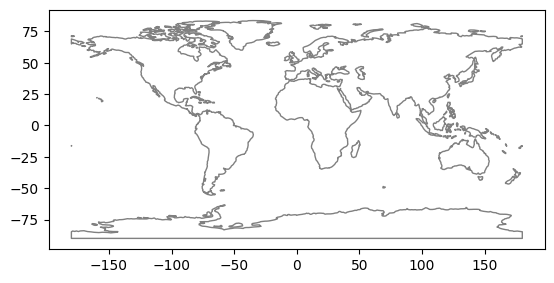

In [9]:
path = get_path('naturalearth.land')
world = gpd.read_file(path)
world.plot(color='white', edgecolor='gray');

## Making the map

We'll use `Point` and `LineString` to plot locations and lines.

In [10]:
from shapely.geometry import Point, LineString

Here's a point that represents the location of Boston.  Notice that when you create a `Point`, the order of latitude and longitude is non-standard.

In [11]:
lat = 42.3601
lon = -71.0589
boston = Point(lon, lat)

The following cell loops through the rows of the DataFrame and creates two GeoSeries: one contains a `Point` for each location, the other contains a `LineString` for each location.

In [12]:
lines = gpd.GeoSeries()
points = gpd.GeoSeries()
points['boston'] = boston

for i, row in df.iterrows():
    timestamp, name, lat, lon = row
    print(name, lat, lon)
    hometown = Point(lon, lat)
    points[name] = hometown
    lines[name] = LineString([hometown, boston])

Luzern 47.050167 8.309307
Harrah, OK 35.4895 97.1636
Brussels, Belgium 50.845539 4.35571
bristol 51.454514 -2.58791
CABA (Buenos Aires City) -34.609032 -58.373219
Botswana -24.277012 22.053224
Santa Monica, CA 34.010929 -118.491508
Framingham, MA, USA 42.50499 -71.19583
Gothenburg 57.696961 11.964948
Wilmington, MA 42.558281 -71.163834
Modest, CA 37.639095 -120.99688
Tacoma, WA 47.252876 -122.44429
Dracut, MA 42.668941 -71.303299
Freehold, NJ 40.2137 -74.3001
Madison, WI 43.0731 -89.4012
Busan 35.179554 129.075638
Taipei 25.032969 121.565414
Cupertino 37.322998 -122.032181
Chicago  41.878113 -87.629799
Austin, Texas 30.300812 -97.724865
Overland Park 38.9822 -94.6708
Barcelona, Spain 41.390205 2.154007
Westwood, MA 42.22499 -71.2226
Bangalore 12.9716 77.5946
Singapore 1.352083 103.819839
Melbourne -37.8136 144.9631
New York  40.832 -73.946105
Stavanger, Norway 58.964432 5.72625
Detroit, Michigan 42.331429 -83.045753
Edison, New Jersey 58.964432 5.72625
Hyatsville, MD 42.3601 -71.0589
A

Now we can plot the world map, the home towns, and the lines.

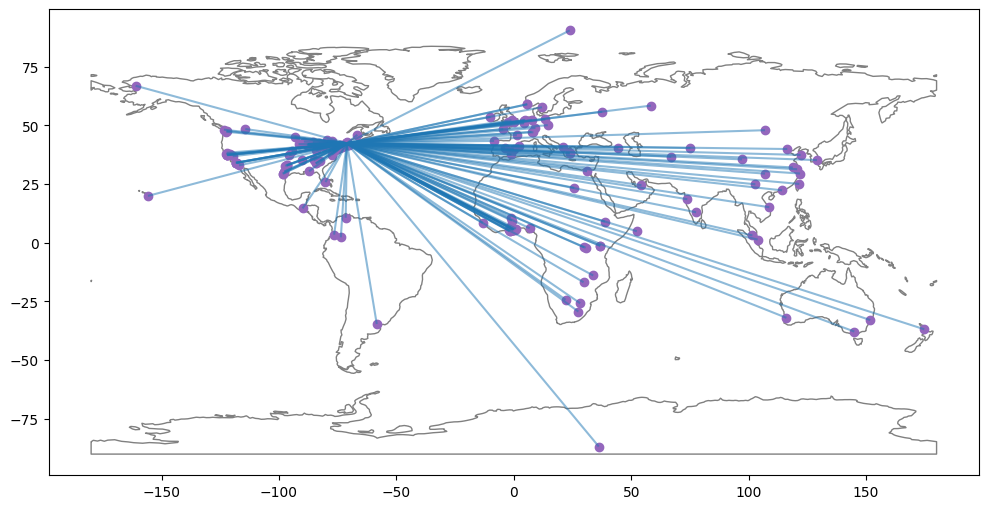

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
ax = plt.gca()

# plot the map
world.plot(color='white', edgecolor='gray', ax=ax)

# plot the lines
lines.plot(color='C0', alpha=0.5, ax=ax)

# plot the points
points.plot(color='C4', ax=ax);

*Elements of Data Science*

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)